R^2 Score: 0.7153731663301331
Mean Squared Error: 17.832513824470173


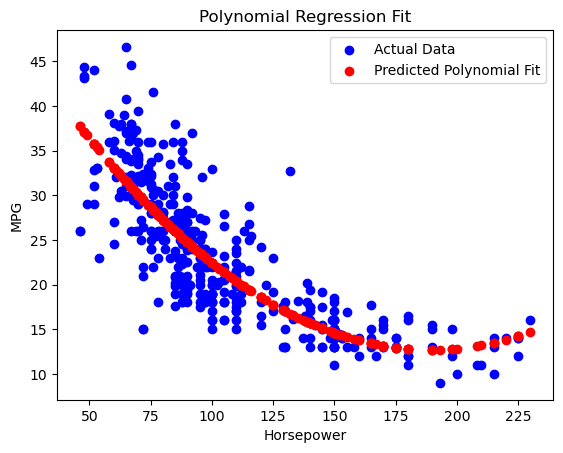

In [13]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
auto_mpg = sns.load_dataset('mpg').dropna()
auto_mpg['horsepower'] = pd.to_numeric(auto_mpg['horsepower'], errors='coerce')
auto_mpg = auto_mpg.dropna(subset=['horsepower'])

# Features and target
X = auto_mpg[['horsepower']]
y = auto_mpg['mpg']

# Polynomial transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=1/3, random_state=0)

# Train model
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)
y_pred = poly_reg.predict(X_test)

# Evaluate
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Plot results
plt.scatter(X['horsepower'], y, color="blue", label='Actual Data')
plt.scatter(X['horsepower'], poly_reg.predict(X_poly), color="red", label='Predicted Polynomial Fit')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.title('Polynomial Regression Fit')
plt.show()
